Use this cell for all your imports

In [92]:
import numpy as np
import scipy.sparse as sparse
from scipy.sparse import coo_matrix, csr_matrix
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt

You will be working with the file data.txt. Use this cell to load its content into the appropriate data structure.

In [93]:
# Load data from file
data = np.loadtxt("data.txt", comments="#", delimiter="\t", dtype=int, unpack=False, skiprows=2)

In [94]:
# Create sparse adjacency matrix
adj_matrix = sparse.coo_matrix((np.ones(data.shape[0]), (data[:, 0], data[:, 1])))

Use this cell to normalize the matrix as you see fit.

In [95]:
# Normalize adjacency matrix
rowsum = np.array(adj_matrix.sum(axis=1)).flatten()
rowsum[rowsum == 0] = 1  # avoid divide by zero
normalized_matrix = adj_matrix.multiply(1 / rowsum).tocsr()

Apply the PageRank algorithm to the matrix you created.

In [96]:
# Set PageRank parameters
alpha = 0.85  # damping factor
max_iter = 100  # maximum number of iterations
tolerance = 1e-6  # convergence tolerance

# Initialize PageRank scores
num_nodes = normalized_matrix.shape[0]
pagerank = np.ones(num_nodes) / num_nodes

# Run PageRank algorithm
for i in range(max_iter):
    prev_pagerank = pagerank.copy()
    pagerank = normalized_matrix.dot(pagerank) * alpha + (1 - alpha) / num_nodes
    delta = np.abs(pagerank - prev_pagerank).sum()
    if delta < tolerance:
        print(f"Converged after {i+1} iterations")
        break

# Sort nodes by PageRank score in descending order
node_scores = {i: score for i, score in enumerate(pagerank)}
sorted_scores = sorted(node_scores.items(), key=lambda x: x[1], reverse=True)

# Print top 10 nodes by PageRank score
print("Top 10 nodes by PageRank score:")
for node, score in sorted_scores[:19]:
    print(f"Node {node}: {score:.5f}")

Converged after 19 iterations
Top 10 nodes by PageRank score:
Node 9905111: 0.00001
Node 9710046: 0.00001
Node 110055: 0.00000
Node 210157: 0.00000
Node 7170: 0.00000
Node 101126: 0.00000
Node 204089: 0.00000
Node 9802051: 0.00000
Node 9809039: 0.00000
Node 9802067: 0.00000
Node 9712253: 0.00000
Node 201253: 0.00000
Node 11197: 0.00000
Node 209230: 0.00000
Node 109162: 0.00000
Node 204253: 0.00000
Node 9909061: 0.00000
Node 9611190: 0.00000
Node 207130: 0.00000


Output a list of the 100 most important papers along with their importance

In [97]:
# Sort nodes by PageRank score in descending order
pagerank_scores = {i: score for i, score in enumerate(pagerank)}
sorted_scores = sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True)

# Print top 100 nodes by PageRank score
print("Top 100 nodes by PageRank score:")
for node, score in sorted_scores[:100]:
    print(f" {node}: {score:.5f}")

Top 100 nodes by PageRank score:
 9905111: 0.00001
 9710046: 0.00001
 110055: 0.00000
 210157: 0.00000
 7170: 0.00000
 101126: 0.00000
 204089: 0.00000
 9802051: 0.00000
 9809039: 0.00000
 9802067: 0.00000
 9712253: 0.00000
 201253: 0.00000
 11197: 0.00000
 209230: 0.00000
 109162: 0.00000
 204253: 0.00000
 9909061: 0.00000
 9611190: 0.00000
 207130: 0.00000
 207116: 0.00000
 111208: 0.00000
 209241: 0.00000
 9906142: 0.00000
 210292: 0.00000
 9806199: 0.00000
 9807171: 0.00000
 211245: 0.00000
 9906018: 0.00000
 9202: 0.00000
 3190: 0.00000
 7195: 0.00000
 106048: 0.00000
 210224: 0.00000
 206063: 0.00000
 9812061: 0.00000
 9908004: 0.00000
 9705131: 0.00000
 211178: 0.00000
 203048: 0.00000
 9912164: 0.00000
 303185: 0.00000
 108172: 0.00000
 9801182: 0.00000
 9803072: 0.00000
 203157: 0.00000
 110274: 0.00000
 104031: 0.00000
 303256: 0.00000
 206038: 0.00000
 9710231: 0.00000
 302125: 0.00000
 9806123: 0.00000
 109212: 0.00000
 111284: 0.00000
 303191: 0.00000
 9801132: 0.00000
 10

Visualize your results

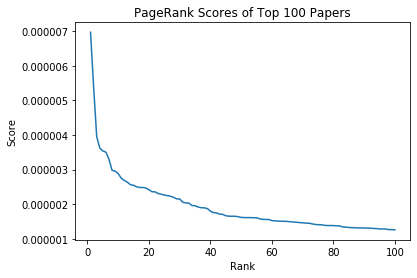

In [98]:
# Create a list of the top 100 paper scores
top_scores = [score for _, score in sorted_scores[:100]]

# Plot the top 100 paper scores
plt.plot(range(1, 101), top_scores)
plt.xlabel("Rank")
plt.ylabel("Score")
plt.title("PageRank Scores of Top 100 Papers")
plt.show()